<a href="https://colab.research.google.com/github/Tattou20/Machine_Learning/blob/main/KNN_NaiveBayes_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ursulla Navalona Arivola N01586516 - Assignment 7

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
from IPython import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay


## Importation of the dataset

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
dr=pd.read_csv('gdrive/My Drive/titanic_train.csv')

In [5]:
dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Droping of the features “ Name, Ticket and Cabin”

In [6]:
dr.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
dr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Convertion of categorical features into integers

### Creation of Dummy Variables and dropping first column to avoid multicollinearity

In [7]:
Sex = pd.get_dummies(dr['Sex'],drop_first = True)
Embark = pd.get_dummies(dr['Embarked'],drop_first = True)

### Addition of dummy variables to original data

In [8]:
dr = pd.concat([dr, Sex, Embark], axis = 1)
dr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


### Remove of Sex and Embarked because dummy variables are created

In [9]:
dr.drop(['Sex', 'Embarked'], axis=1, inplace = True)
dr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Check of Null Values

In [28]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age             True
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

### Replace of Null Values in "Age" with mean value of "Age"

In [29]:
dr.fillna(value = { "Age" : dr['Age'].mean()}, inplace = True)

In [30]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

### Drop all the rows containing Null Values

In [31]:
dr.dropna(inplace=True)

In [32]:
dr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [34]:
dr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Extraction of features and labels

In [35]:
X = dr.drop(['Survived'], axis = 1).values

In [36]:
y = dr['Survived'].values

### Visualizatio of the data

In [37]:
X.shape

(891, 9)

In [38]:
y.shape

(891,)

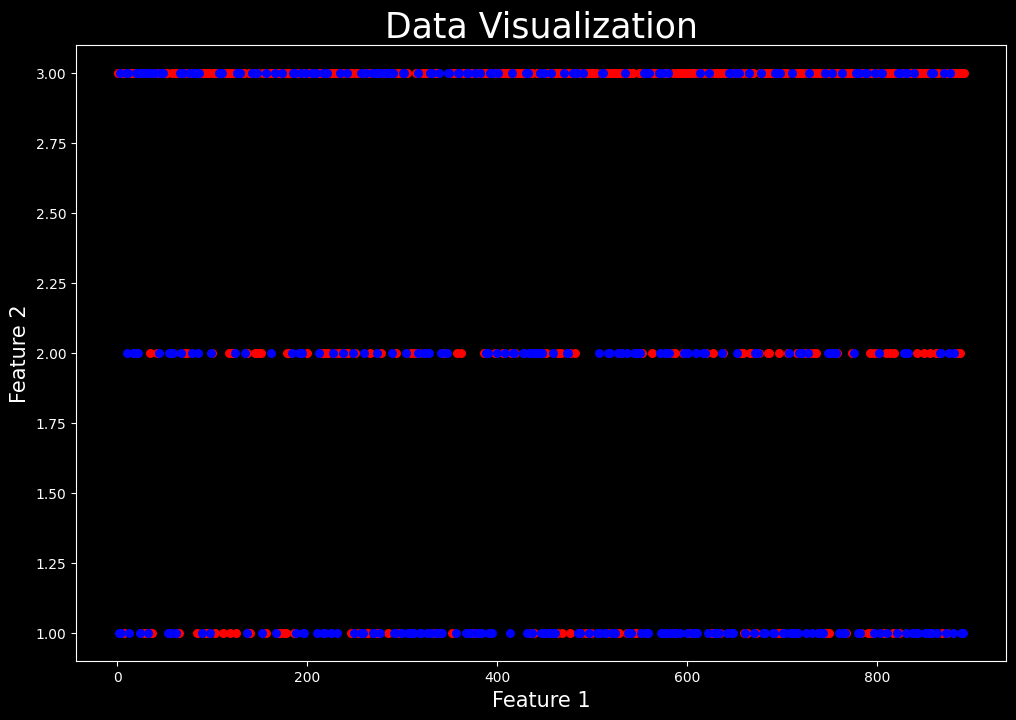

In [39]:
plt.figure(figsize = (12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 30, c = 'red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 30, c = 'blue')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization', fontsize = 25)
plt.show()

### Data Splitting

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Visualization of training data

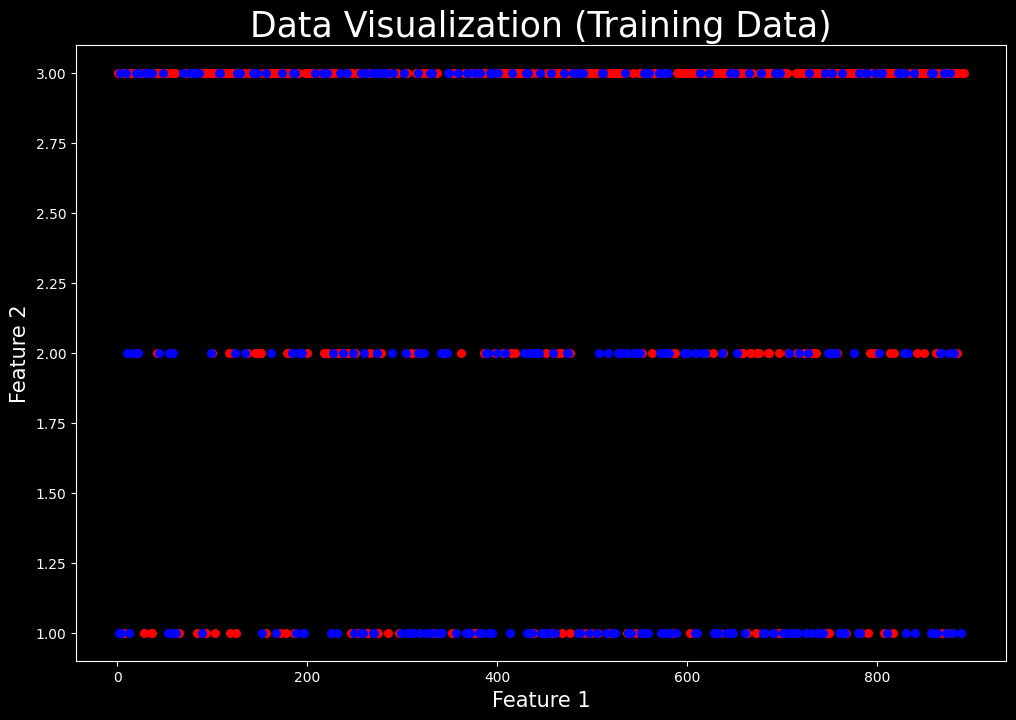

In [41]:
plt.figure(figsize = (12,8))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s = 30, c = 'red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s = 30, c = 'blue')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Training Data)', fontsize = 25)
plt.show()

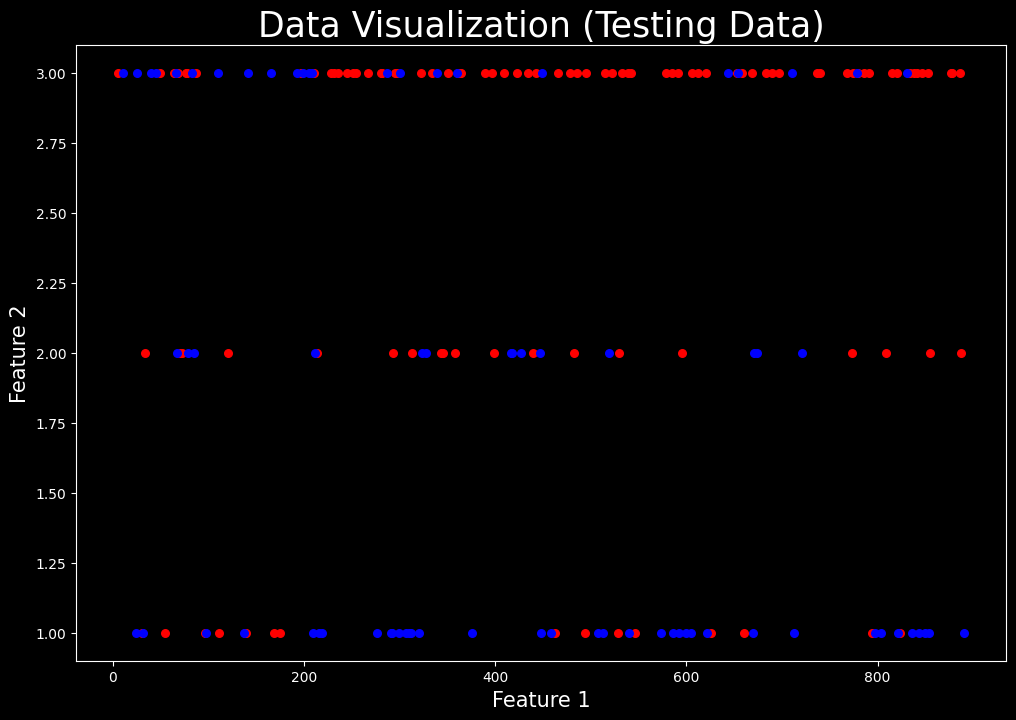

In [42]:
plt.figure(figsize = (12,8))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Testing Data)', fontsize = 25)
plt.show()

## Application of KNN Classifier

In [44]:
knn = KNeighborsClassifier()

### Train of the model and prediction of the test data

In [45]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [46]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 65.92


### Visualization of the data predicted by KNN Classifier

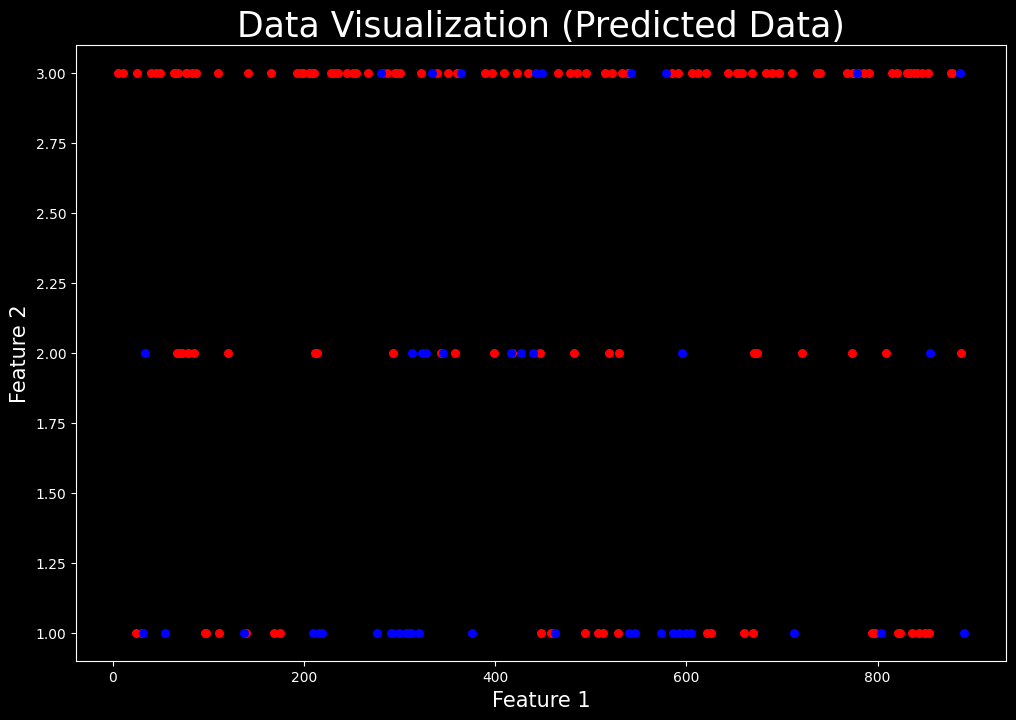

In [47]:
plt.figure(figsize = (12,8))
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], s = 30, c = 'red')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], s = 30, c = 'blue')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization (Predicted Data)', fontsize = 25)
plt.show()

## Evaluation of the model performance by calculating the Confusion Matrix

### Getting CV Score on Training data

In [55]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression model
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train, y_train, scoring='accuracy', cv=cv )
np.mean(scores)
print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.79


An average accuracy of 0.79 means that the model is correctly classifying the data with an accuracy of 79%.

### Get Predictions from test data

In [56]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)

### Generate of Confusion Matrics

In [57]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

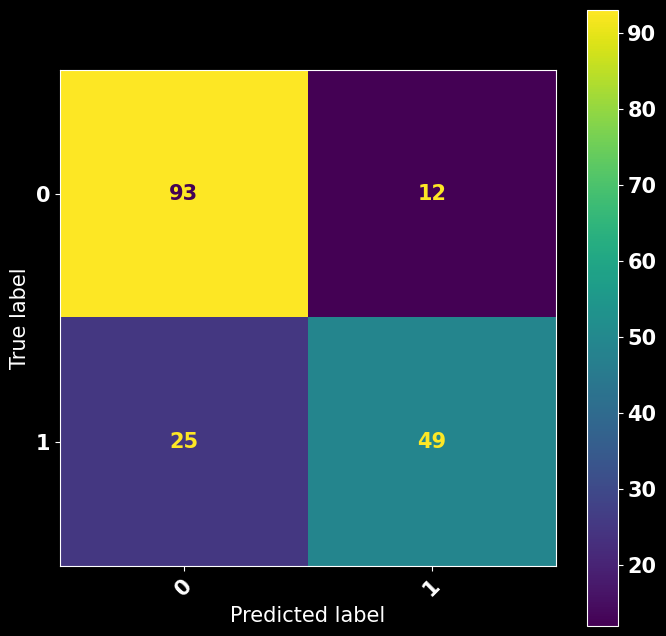

In [58]:
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

There are many false value, so the prediction is bad.

## Calcul of Accuracy

In [59]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 79.33


It indicates that the model predicts the target variable for approximately 79.33% of the test data, which is not a strong performance

## Calcul Precision, Recall and F1-Score

In [60]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_cv, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_cv, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_cv, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_cv, average = 'macro')]})

In [61]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.793296,0.795707,0.773938,0.780003


There is little variance of the result, so the dataset is not balanced well.

### Standardization of the data

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Evaluation of the model performance by calculating the Confusion Matrix and Accuracy

## Application of Logistic Regression

In [63]:
model = LogisticRegression()
LR = model.fit(X_train, y_train)

In [65]:
y_pred_LR = LR.predict(X_test)

## Calcul of Accuracy

In [66]:
Accuracy = np.mean(y_pred_LR == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 80.45


## Confusion Matrics

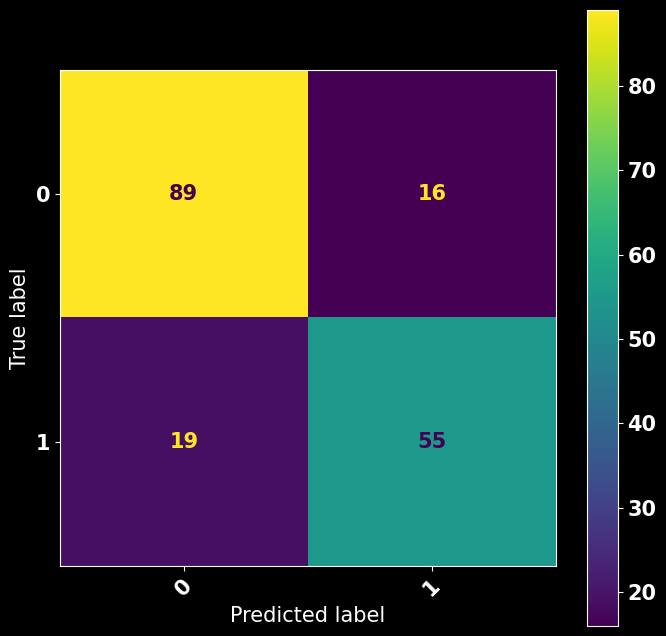

In [74]:
cm = confusion_matrix(y_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

## Application of Naive Baye's Classifier

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

In [68]:
y_pred_NB = NB.predict(X_test)

### Calcul of Accuracy

In [69]:
Accuracy = np.mean(y_pred_NB == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.09


## Confusion Matrics

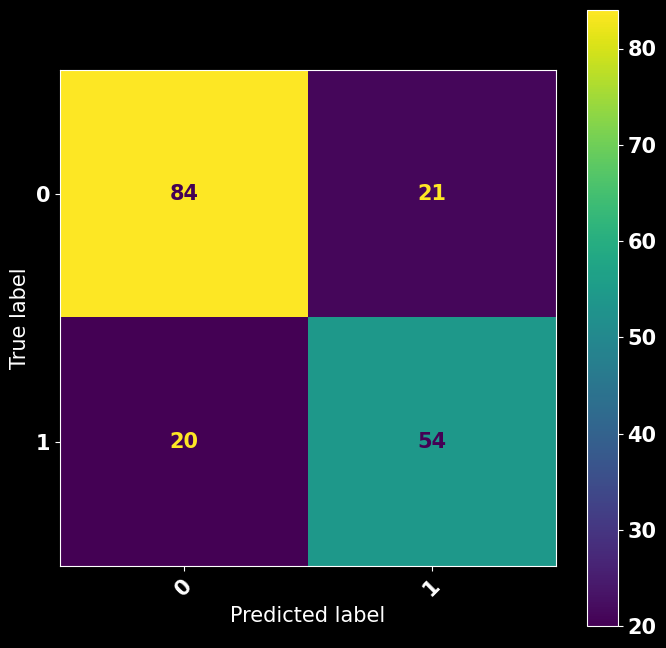

In [73]:
cm = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

As we see on the confusion matrix and accuracy, Logistic Regression has better performance tha Naive Bayes because there are a lot of correlation in the dataset.

### Predict Class probabilities

In [75]:
y_pred_prob_LR = LR.predict_proba(X_test).round(2)

In [76]:
y_pred_prob_NB = NB.predict_proba(X_test).round(2)

In [ ]:
df = pd.DataFrame({"NB_class_0": y_pred_prob_NB[:,0]
,"NB_class_1": y_pred_prob_NB[:,1]
,"NB Prediction": y_pred_NB
,"LR_class_0": y_pred_prob_LR[:,0]
,"LR_class_1": y_pred_prob_LR[:,1]
,"LR_Prediction": y_pred_LR})
df.head(40)

### Application of PCA to create uncorrelated features

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

### Check of the correlation between the features

In [79]:
cor = np.corrcoef(X_pca_train[:,0], X_pca_train[:,1]).round(2)
cor

array([[1., 0.],
       [0., 1.]])

## Application of Logistic Regression on uncorrelated data

In [ ]:
LRPCA = LogisticRegression()
LRPCA.fit(X_pca_train, y_train)

In [81]:
y_pred_pca = LRPCA.predict(X_pca_test)

In [82]:
Accuracy = np.mean(y_pred_pca == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 68.16


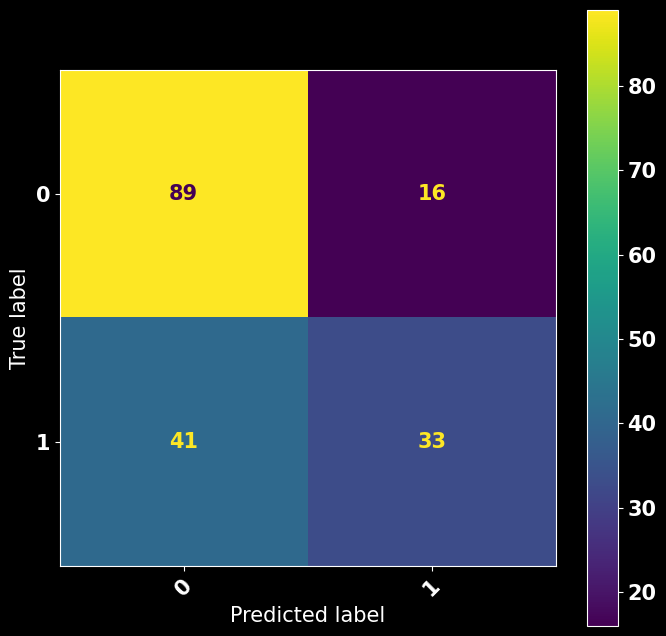

In [86]:
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

## Application of Naive Baye's on uncorrelated data

In [ ]:
NB_model_PCA = GaussianNB()
NB_model_PCA.fit(X_pca_train, y_train)

In [84]:
y_pred_NBPCA = NB_model_PCA.predict(X_pca_test)

In [85]:
Accuracy = np.mean(y_pred_NBPCA == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 70.39


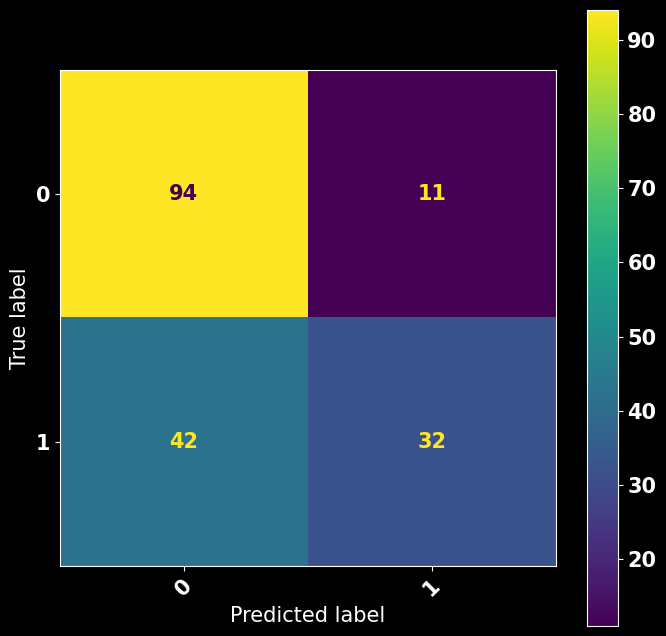

In [87]:
cm = confusion_matrix(y_test, y_pred_NBPCA)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

As we see in the result, Naive Baye's classifier has better performance than Logistic regression after application of PCA where we minimanized the correlation.